# EDA IN TITANIC SURVIVAL AND PASSENGERS INFORMATION

In [2]:

import pandas as pd
df=pd.read_csv(r'C:\Users\rocky\OneDrive\Desktop\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## DATA CLEANING

In [22]:
print(df.isnull().sum())
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Embarked' in df.columns:
    if df['Embarked'].notna().any():
        most_common_embarked = df['Embarked'].mode()[0] if not df['Embarked'].mode().empty else 'S'
        df['Embarked'].fillna(most_common_embarked, inplace=True)
    else:
        df['Embarked'].fillna('S', inplace=True) 
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
if 'Name' in df.columns:
    df.drop(columns=['Name'], inplace=True)
if 'Ticket' in df.columns:
    df.drop(columns=['Ticket'], inplace=True)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print(f"Empty columns detected: {empty_cols}")
    df.drop(columns=empty_cols, inplace=True)
print(df.info())

PassengerId      0
Survived         0
Pclass           0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       891
FamilySize       0
dtype: int64
Empty columns detected: Index(['Sex'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None


C:\Users\rocky\AppData\Local\Temp\ipykernel_31860\2330542602.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'S' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Embarked'].fillna('S', inplace=True)  # Default to 'S' if no mode


## checking the missing columns

In [21]:
expected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following expected columns are missing: {missing_columns}")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,NaN,22.0,1,0,7.2500,NaN,2
1,2,1,1,NaN,38.0,1,0,71.2833,NaN,2
2,3,1,3,NaN,26.0,0,0,7.9250,NaN,1
3,4,1,1,NaN,35.0,1,0,53.1000,NaN,2
4,5,0,3,NaN,35.0,0,0,8.0500,NaN,1


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# VISUALIZATION 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


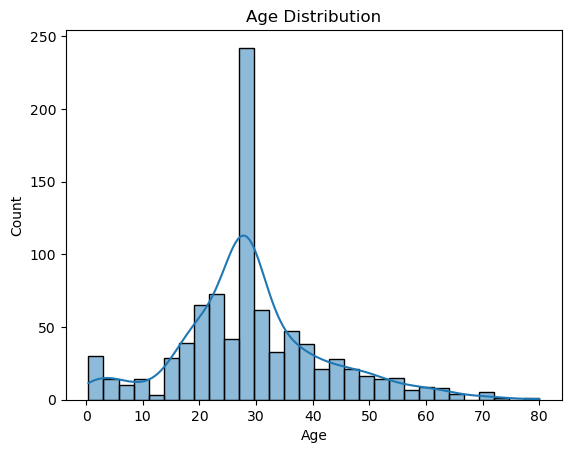

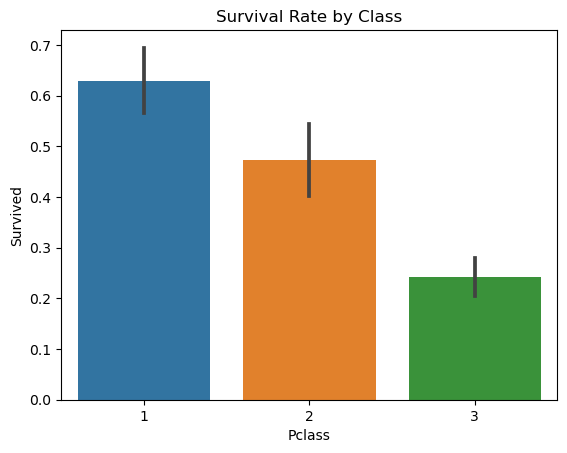

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of Age
if 'Age' in df.columns and not df['Age'].isnull().all() and not df['Age'].empty:
    sns.histplot(df['Age'], kde=True)
    plt.title('Age Distribution')
    plt.show()

# Survival rate by gender
if 'Sex' in df.columns and 'Survived' in df.columns and not df[['Sex', 'Survived']].isnull().any().any():
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival Rate by Gender')
    plt.show()

# Survival rate by class
if 'Pclass' in df.columns and 'Survived' in df.columns and not df[['Pclass', 'Survived']].isnull().any().any():
    sns.barplot(x='Pclass', y='Survived', data=df)
    plt.title('Survival Rate by Class')
    plt.show()

# Pairplot to see pairwise relationships
required_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
if all(col in df.columns for col in required_columns) and not df[required_columns].isnull().any().any():
    sns.pairplot(df[required_columns])
    plt.show()


## Survival of the whole family with respect to size of family

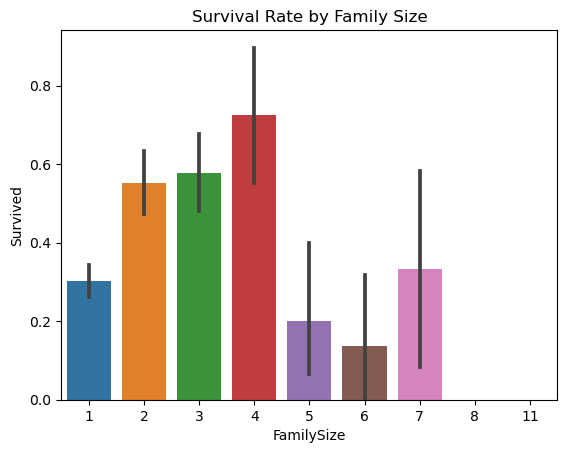

In [27]:
# Family size
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    if 'FamilySize' in df.columns and not df['FamilySize'].isnull().all() and not df['FamilySize'].empty:
        sns.barplot(x='FamilySize', y='Survived', data=df)
        plt.title('Survival Rate by Family Size')
        plt.show()


## Overall analysis in visuals 

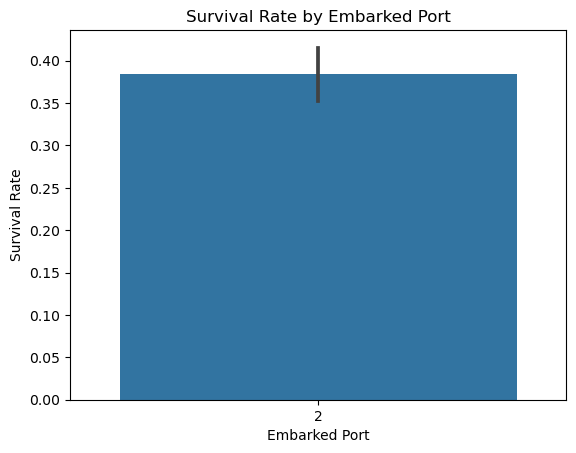

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


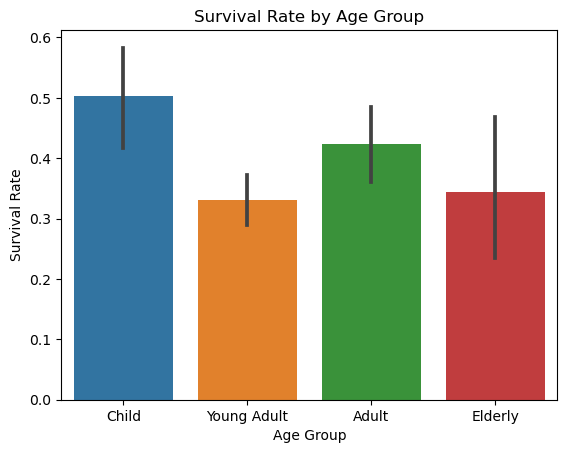

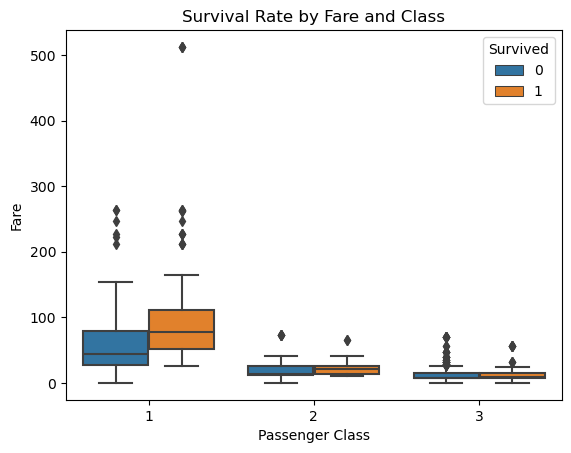

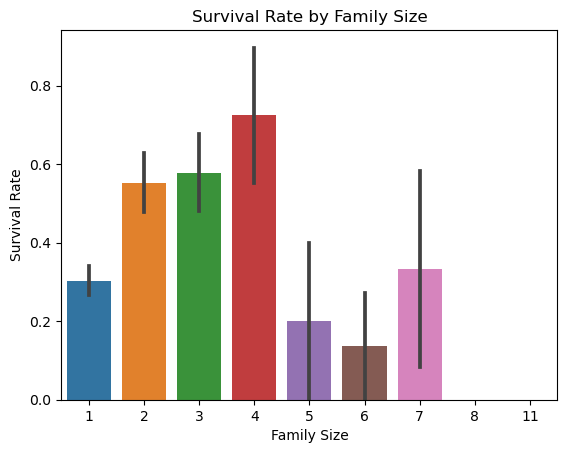

In [29]:
if 'Embarked' in df.columns and 'Survived' in df.columns and not df[['Embarked', 'Survived']].isnull().any().any():
    sns.barplot(x='Embarked', y='Survived', data=df)
    plt.title('Survival Rate by Embarked Port')
    plt.xlabel('Embarked Port')
    plt.ylabel('Survival Rate')
    plt.show()
if 'Age' in df.columns and 'Survived' in df.columns and not df[['Age', 'Survived']].isnull().any().any():
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])
    sns.barplot(x='AgeGroup', y='Survived', data=df)
    plt.title('Survival Rate by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Survival Rate')
    plt.show()
if 'Pclass' in df.columns and 'Fare' in df.columns and 'Survived' in df.columns and not df[['Pclass', 'Fare', 'Survived']].isnull().any().any():
    sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
    plt.title('Survival Rate by Fare and Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Fare')
    plt.show()
if 'FamilySize' in df.columns and 'Survived' in df.columns and not df[['FamilySize', 'Survived']].isnull().any().any():
    sns.barplot(x='FamilySize', y='Survived', data=df)
    plt.title('Survival Rate by Family Size')
    plt.xlabel('Family Size')
    plt.ylabel('Survival Rate')
    plt.show()
if 'Cabin' in df.columns and 'Survived' in df.columns:
    df['HasCabin'] = df['Cabin'].notna()
    sns.barplot(x='HasCabin', y='Survived', data=df)
    plt.title('Survival Rate by Cabin vs. Non-Cabin Passengers')
    plt.xlabel('Has Cabin')
    plt.ylabel('Survival Rate')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()
import re
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
if 'Name' in df.columns and 'Survived' in df.columns:
    df['Title'] = df['Name'].apply(extract_title)
    sns.barplot(x='Title', y='Survived', data=df)
    plt.title('Survival Rate by Title')
    plt.xlabel('Title')
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=45)
    plt.show()